# Problem Statement
### In recent times, A city hotel have seen high cancellation rates. so now the hotel is dealing with number of issues as a result including less revenue and ideal less room use. Consequestly, lowering cancellation rates for hotel is our primary goal in order to increase their efficiency in generating revenue and for us to offer advice and recommendations to address this problem.
### The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are on this report.

# Research Question

* What are the variables that affect hotel reservation cancellation?
* How can we decrease hotel's booking cancellation?
* How can hotels be assisted in making pricing and promotional decisions?

# Importing libraries

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [49]:
df = pd.read_csv('hotel_booking.csv')

In [50]:
df.shape

(119390, 36)

In [51]:
 df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [52]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


# Descriptive Analysis

In [53]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [54]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [55]:
df = df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']]

In [56]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [58]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [59]:
df.dropna(inplace=True)

In [60]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [61]:
df.isna().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [62]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 118898, dtype: bool

In [63]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [64]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

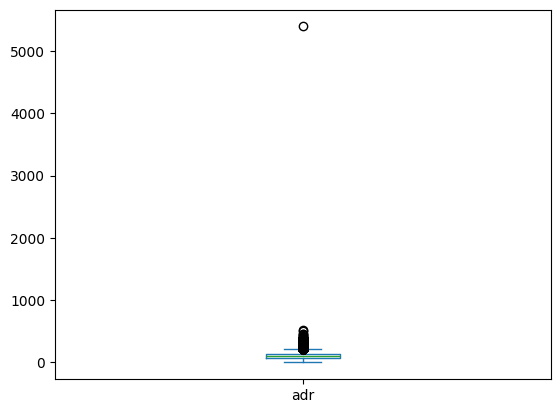

In [65]:
df['adr'].plot(kind = 'box')

In [66]:
df = df[df['adr']<5000]

<Axes: >

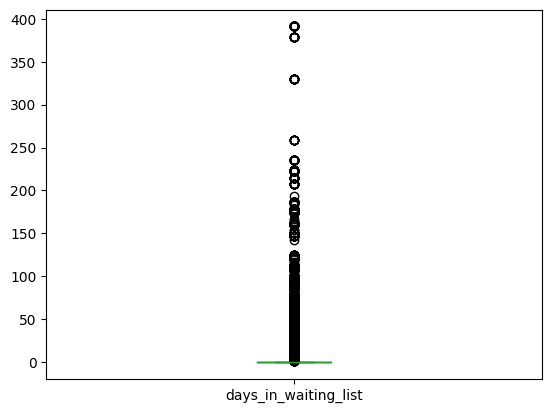

In [67]:
df['days_in_waiting_list'].plot(kind = 'box')

# Creating Visualizations

In [68]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

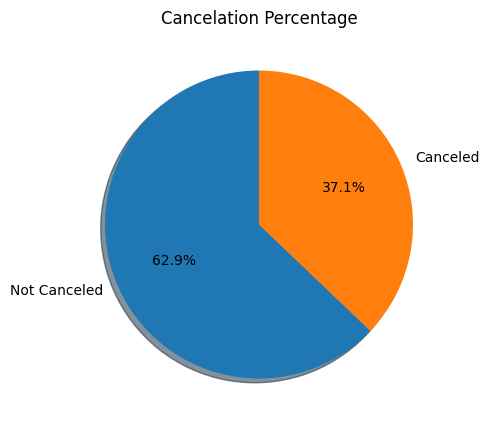

In [69]:
is_canceled = df['is_canceled'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(is_canceled, startangle=90,shadow= True, labels= is_canceled.index.map({0: "Not Canceled", 1: "Canceled"}), autopct= "%1.1f%%" )
plt.title('Cancelation Percentage')
plt.show()

### As we can see that there are siginificant no. of cancelations i.e. 37.1% of clients who canceled their reservation impacting overall revenue. It is certain that there are more reservations that are not canceled but still out of total 37.1% are canceled which is quite huge.

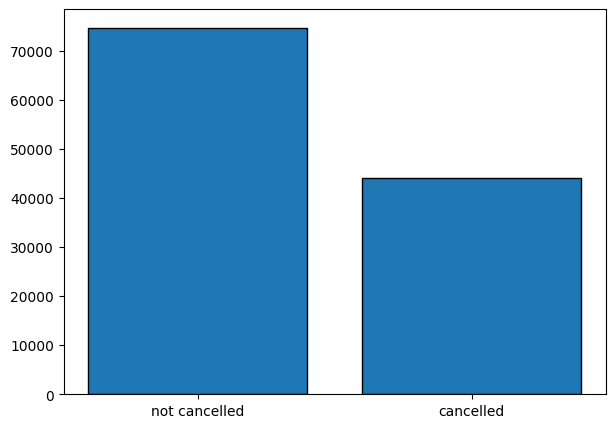

In [70]:
plt.figure( figsize = (7,5))
plt.bar( ['not cancelled','cancelled'],is_canceled, edgecolor = 'k')
plt.show()

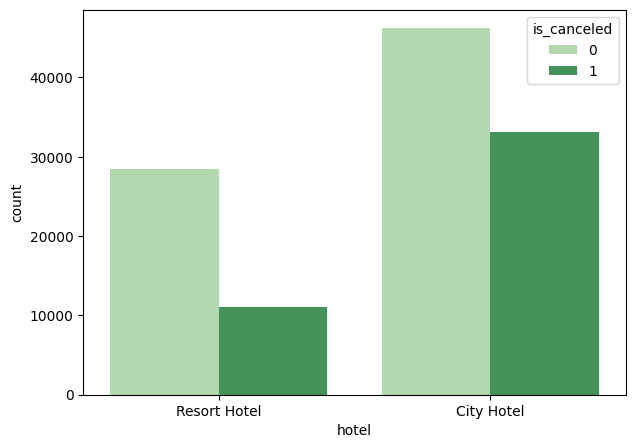

In [71]:
plt.figure( figsize = (7,5))
ax = sns.countplot(data = df, x = 'hotel', hue = 'is_canceled', palette = 'Greens')
plt.show()

## This above countplot shows that among two hotels city hotel has higher number of reservations 58% and but at the same time their cancellation rates are also higher 42%. That means 58% are not cancelled and 42% are canceled in City Hotel, which is the problem.
## Where as on the other hand Resort hotel no. of reservation are less than that of city hotel, in which 72% is not cancelled and 28% is canceled which is less severe than that of resort hotel.

In [72]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [73]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True) 

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [74]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

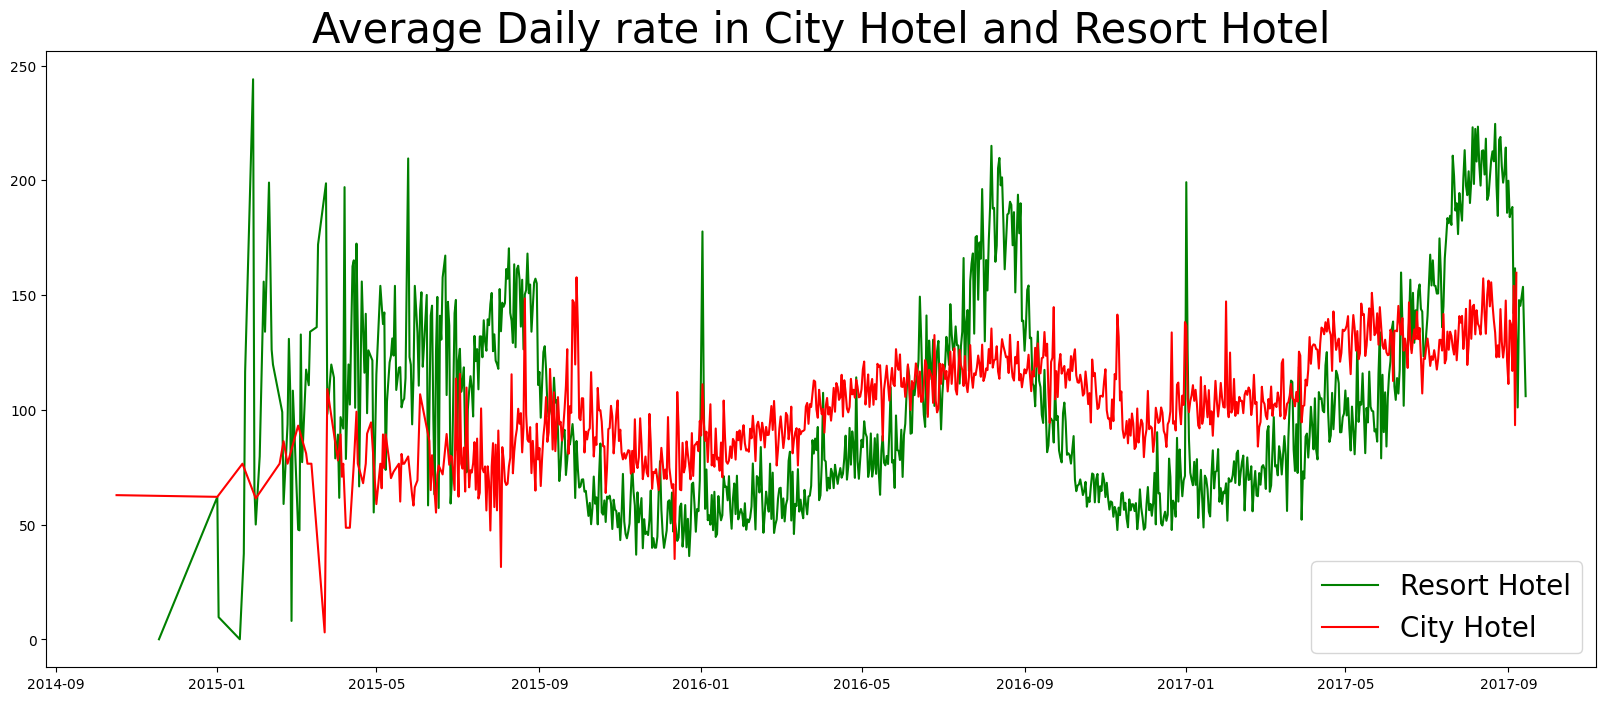

In [75]:
plt.figure(figsize=(20,8))
plt.title('Average Daily rate in City Hotel and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel',color = 'green')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel', color = 'red')
plt.legend(fontsize = 20)
plt.show()

## The accompanying plot shows the average daily rate of city hotel(by red) and resort hotel(by green) grouped by reservation status date. The plot provides clearer insights explaining the reason for the cancelations which is, city hotel has higher average daily rate than resort hotel which is resulting in higher cancellations of reservations. 
## Resort hotel has lower adr but is not stable throughout.

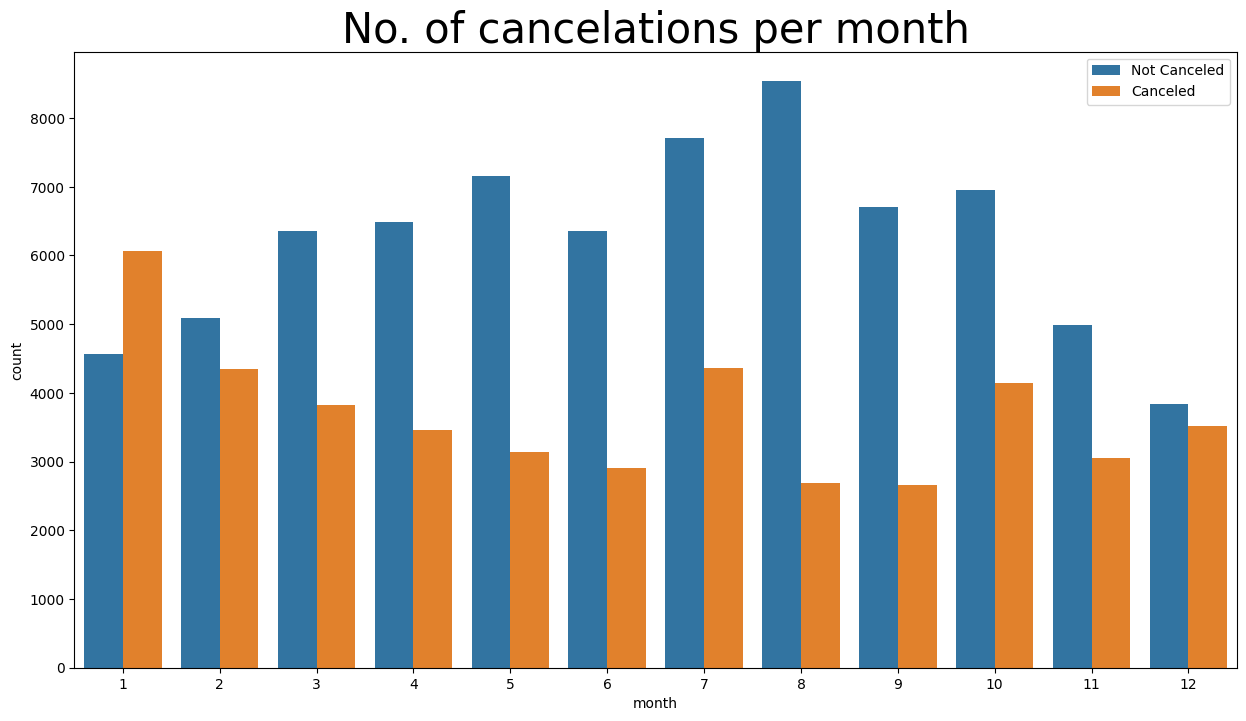

In [83]:
df['month'] = df['reservation_status_date'].dt.month

plt.figure( figsize = (15,8))
plt.title('No. of cancelations per month', fontsize = 30)
sns.countplot(data = df, x = 'month', hue = 'is_canceled')
plt.legend(['Not Cancelled', 'Canceled'])
plt.show()

## It shows no. of cancellations per month. In january we have the maximum number of cancellations of all time and even more than the reservations that are not cancelled And in August we have lowest no. of cancellations and highest numbers of reservations that are not cancelled. Lets find out the reason why!

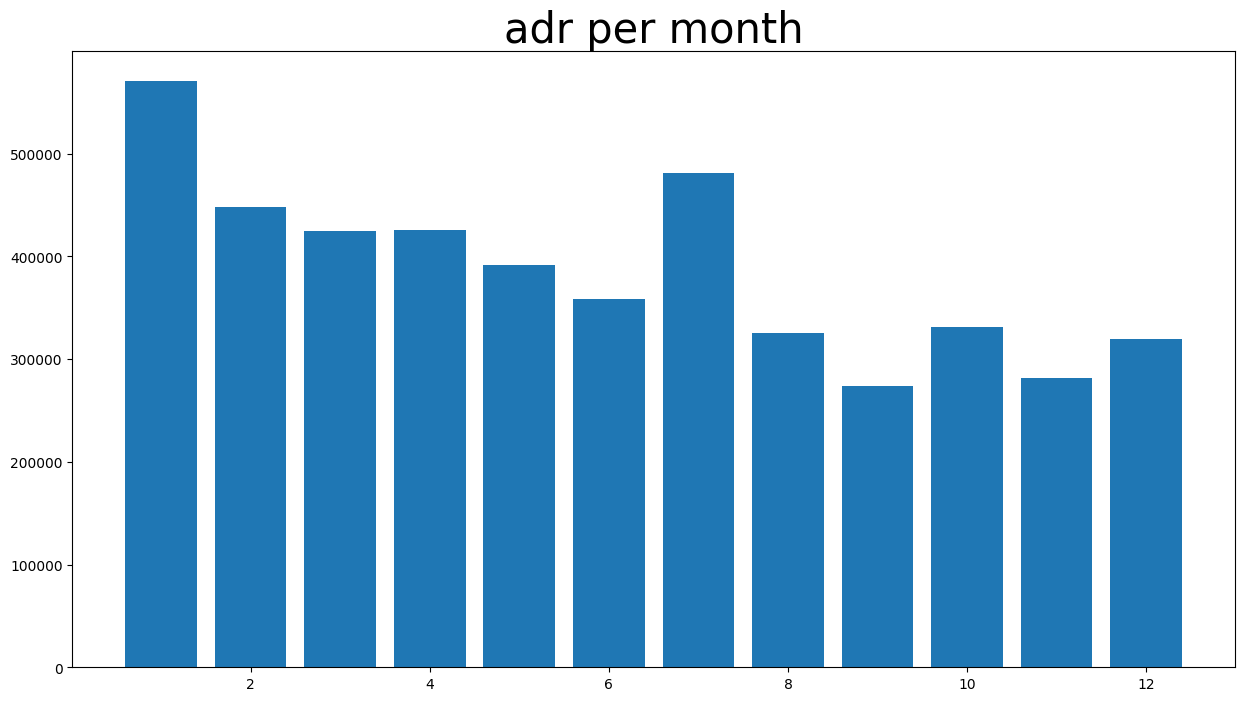

In [77]:
adr_per_month = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

plt.figure( figsize = (15,8))
plt.title('adr per month', fontsize = 30)
plt.bar(x = adr_per_month['month'], height = adr_per_month['adr'])

# sns.barplot('month', 'adr', data = adr_per_month)
plt.show()

## The reason why we have highest cancellations in January and lowest in August is because we have highest avg. daily rate in january and lowest in August.
## From these visualisations we can conclude that Average daily rate is the important factor influencing cancellations of reservations. Hence, the hotel should focus on optimising prcing strategies.


In [78]:
canceled_data = df[df['is_canceled'] == 1 ] 
top_10_countries = canceled_data['country'].value_counts()[:10]


In [81]:
top_10_countries

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

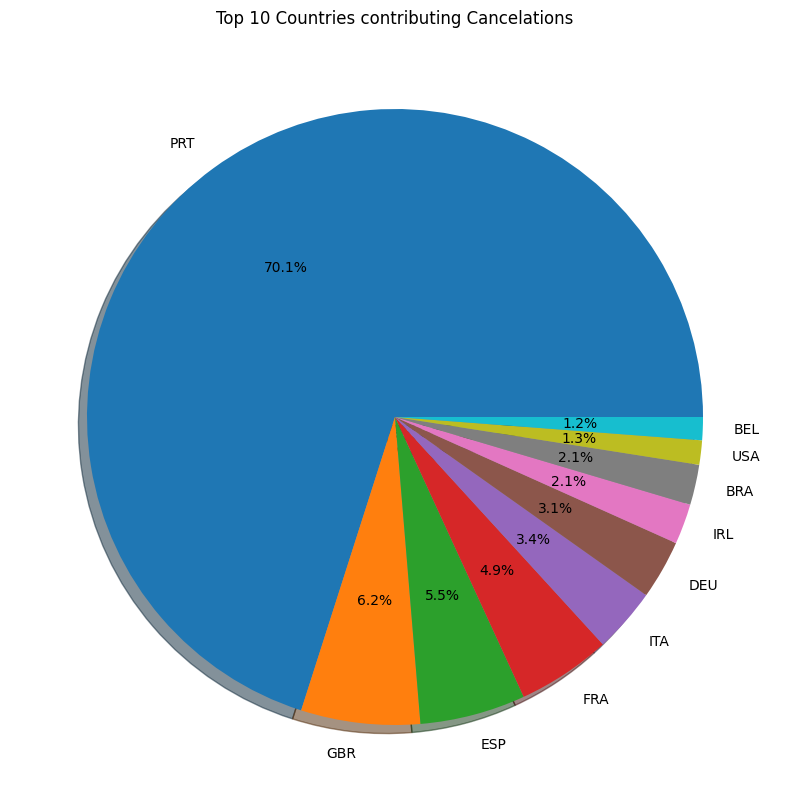

In [82]:
plt.figure(figsize=(20,10))
plt.pie(top_10_countries, autopct='%.1f%%', shadow=True,labels=top_10_countries.index)
plt.title('Top 10 Countries contributing Cancelations')
plt.show()

## 70.1% of the total cancellations are comming from Portuguese. We recommend adopting campaigns, advertisements effective pricing strategies & Discounts 

In [ ]:
df['market_segment'].value_counts()

In [ ]:
df['market_segment'].value_counts(normalize=True)*100

In [ ]:
canceled_data['market_segment'].value_counts()

In [ ]:
canceled_data['market_segment'].value_counts(normalize=True)*100

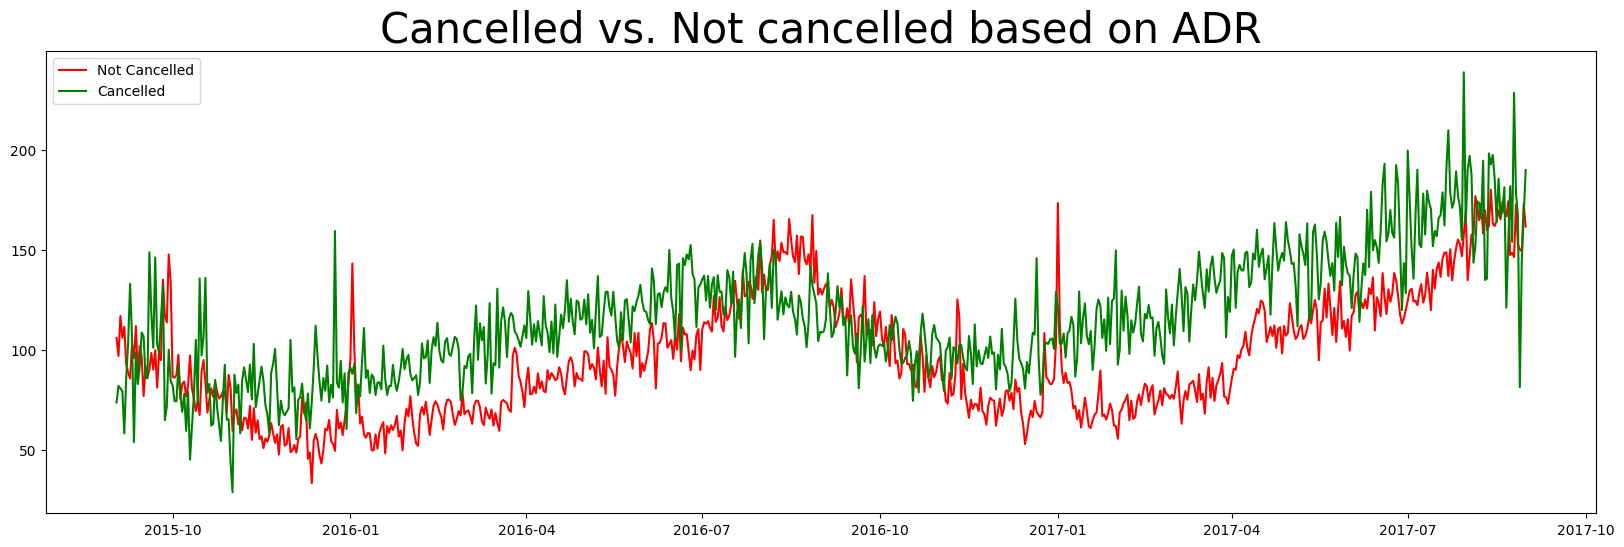

In [86]:
canceled_data_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
canceled_data_adr = canceled_data_adr[(canceled_data_adr['reservation_status_date'] > '2015-09') & (canceled_data_adr['reservation_status_date'] < '2017-09' )]
canceled_data_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_data = df[df['is_canceled'] == 0] 
not_canceled_data_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
not_canceled_data_adr = not_canceled_data_adr[(not_canceled_data_adr['reservation_status_date'] > '2015-09') & (not_canceled_data_adr['reservation_status_date'] < '2017-09' )]
not_canceled_data_adr.sort_values('reservation_status_date',inplace=True)


plt.figure(figsize=(20,6))
plt.plot(not_canceled_data_adr['reservation_status_date'], not_canceled_data_adr['adr'], label='Not Cancelled', color = 'red')
plt.plot(canceled_data_adr['reservation_status_date'], canceled_data_adr['adr'], label='Cancelled', color= 'green')
plt.legend()
plt.title('Cancelled vs. Not cancelled based on ADR', fontsize= 30)
plt.show()

## This plot represents cancelled vs. not cancelled based on Average Daily Rate. The red colored line indicates not cancelled that means when adr is lower people do not tends to cancel their reservations. But when the adr is higher(represented by green line) people tends to cancel thier reservation more.
## his shows direct relationship between be adr and cancellations. 
## Implementing effective adr strategies can help hotels boosting revenue and recovering from high cancellations rates
